In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

import string
from string import digits

import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
from sklearn import preprocessing
le =  preprocessing.LabelEncoder()
df["sentiment"] = le.fit_transform(df['sentiment'])

In [ ]:
df.head

<bound method NDFrame.head of                                                   review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]>

In [ ]:
df.isnull().sum()


review       0
sentiment    0
dtype: int64

In [ ]:
X = df["review"]
y = df["sentiment"]

In [ ]:
def stringprocess(text):
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')

    return text

In [ ]:
def  textpreprocess(text):

    text = map(lambda x: x.lower(), text) # Lower case
    text = map(lambda x: re.sub(r"https?://\S+|www\.\S+", "", x), text) # Remove Links
    text = map(lambda x: re.sub(re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"),"", x), text) # Remove html tags
    text = map(lambda x: re.sub(r'[^\x00-\x7f]',r' ', x), text) # Remove non-ASCII characters
    # Remove special special characters, including symbols, emojis, and other graphic characters

    emoji_pattern = re.compile(
            '['
            u'\U0001F600-\U0001F64F'  # emoticons
            u'\U0001F300-\U0001F5FF'  # symbols & pictographs
            u'\U0001F680-\U0001F6FF'  # transport & map symbols
            u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
            u'\U00002702-\U000027B0'
            u'\U000024C2-\U0001F251'
            ']+',
            flags=re.UNICODE)

    text = map(lambda x: emoji_pattern.sub(r'', x), text)
    text = map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), text) # Remove punctuations

    #text = text.apply(lambda x: TextBlob(x).correct()) # Spelling correction

    remove_digits = str.maketrans('', '', digits)
    text = [i.translate(remove_digits) for i in text]
    text = [w for w in text if not w in stop_words]
    text = ' '.join([lemmatizer.lemmatize(w) for w in text])
    text = text.strip()
    return text

In [ ]:
X = X.apply(lambda x: stringprocess(x))
word_tokens = X.apply(lambda x: word_tokenize(x))

preprocess_text = word_tokens.apply(lambda x: textpreprocess(x))
preprocess_text[0]

'one reviewer mentioned watching  oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill 

In [ ]:
training_portion = 0.8
train_size = int(len(preprocess_text) * training_portion)

train_data = preprocess_text[0: train_size]
train_labels = np.array(y[0: train_size])

validation_data = preprocess_text[train_size:]
validation_labels = np.array(y[train_size:])


print(len(train_data))
print(len(train_labels))
print(len(validation_data))
print(len(validation_labels))

40000
40000
10000
10000


In [ ]:
vocab_size = 500
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'br': 2,
 'movie': 3,
 'film': 4,
 'one': 5,
 'like': 6,
 'would': 7,
 'time': 8,
 'good': 9,
 'character': 10}

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_data)
print(train_sequences[10])

[1, 1, 5, 1, 4, 1, 332, 96, 1, 172, 152, 1, 1, 2, 2, 25, 1, 93, 69, 3, 1, 59, 285, 1, 69, 1, 2, 2, 251, 218, 4, 1, 42, 183, 93, 121, 10, 1, 314, 437, 2, 2, 1, 4, 7, 1, 1, 1, 1, 2, 2, 57, 1, 51, 124, 306, 73, 1]


In [ ]:
embedding_dim = 50
max_length = 70
trunc_type = 'post'  # remove or truncate last words in sentences if max_length > 50 ans "post" defined last at sentence
padding_type = 'post'

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

170
70


In [ ]:
train_padded[0]

array([  5,   1,   1,  66,   1, 173,   1, 102, 494, 486,   2,   2,  25,
        28,   1,   1,   1,   1,  18, 449, 114, 102, 244,  32,   1,  26,
         1,   1,   1,  26,   1,   1,   1,   1, 266, 449,   1, 217, 254,
       244,   2,   2, 325,   1,   1, 255,   1,   1,   1,   1,   1,   1,
         1,   1, 382,   1,   1,   1,   1,   1,   1, 222,   1,   1, 200,
         1,   1, 382, 238,  39], dtype=int32)

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_data)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

10000
(10000, 70)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_data(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_data(train_padded[10]))
print('---')
print(train_data[10])

<OOV> <OOV> one <OOV> film <OOV> based around <OOV> everything rather <OOV> <OOV> br br first <OOV> pretty funny movie <OOV> find joke <OOV> funny <OOV> br br low budget film <OOV> never problem pretty interesting character <OOV> lost interest br br <OOV> film would <OOV> <OOV> <OOV> <OOV> br br something <OOV> better try brother another <OOV> ? ? ? ? ? ? ? ? ? ? ? ?
---
phil alien one quirky film humour based around oddness everything rather actual punchlines br br first odd pretty funny movie progressed find joke oddness funny anymore br br low budget film thats never problem pretty interesting character eventually lost interest br br imagine film would appeal stoner currently partaking br br something similar better try brother another planet


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(64,activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          25000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 57065 (222.91 KB)
Trainable params: 57065 (222.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 5
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/5
1250/1250 - 56s - loss: 1555457.6250 - accuracy: 0.5886 - val_loss: 614.3649 - val_accuracy: 0.5007 - 56s/epoch - 45ms/step
Epoch 2/5
1250/1250 - 51s - loss: 1113.9481 - accuracy: 0.4996 - val_loss: 735.8503 - val_accuracy: 0.4993 - 51s/epoch - 41ms/step
Epoch 3/5
1250/1250 - 52s - loss: 1305.7133 - accuracy: 0.4959 - val_loss: 1395.4670 - val_accuracy: 0.5007 - 52s/epoch - 41ms/step
Epoch 4/5
1250/1250 - 52s - loss: 1217.1960 - accuracy: 0.5024 - val_loss: 935.7385 - val_accuracy: 0.5007 - 52s/epoch - 42ms/step
Epoch 5/5
1250/1250 - 53s - loss: 93229.0469 - accuracy: 0.5061 - val_loss: 288.2579 - val_accuracy: 0.5008 - 53s/epoch - 42ms/step


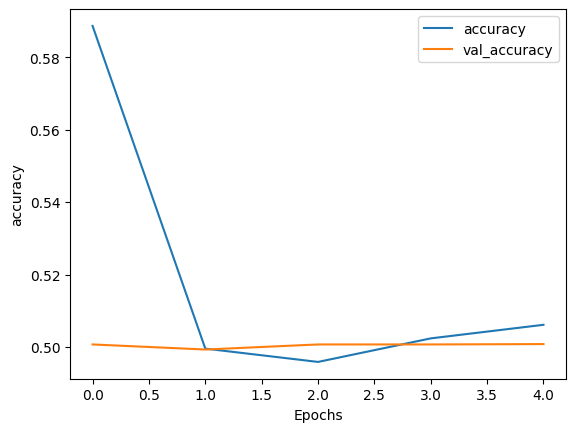

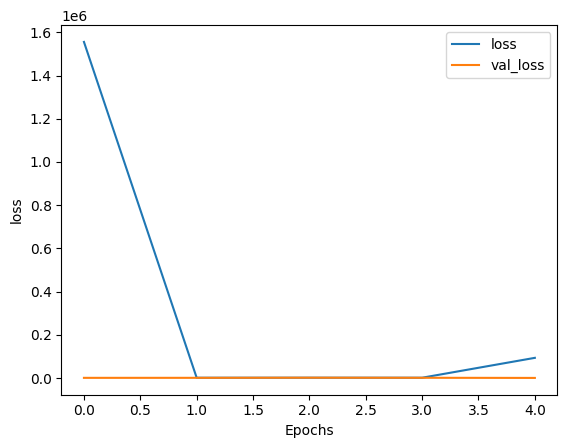

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_padded, validation_labels)

print("Validation Accuracy:", accuracy)


313/313 [==============================] - 5s 15ms/step - loss: 288.2579 - accuracy: 0.5008
Validation Accuracy: 0.5008000135421753


In [ ]:

# seed_text ="I like my laptop but its hanged"
seed_text = "wonderful little production br br filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece br br actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life br br realism really come home little thing fantasy guard rather use traditional would ream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_length-1, padding=padding_type, truncating=trunc_type)
predicted = (model.predict(token_list, verbose=0) > 0.5).astype("int32")

if predicted[0][0] == 0:
    print("Negative")
else:
    print("Positive")


Positive


In [ ]:
preprocess_text[1]

'wonderful little production br br filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece br br actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life br br realism really come home little thing fantasy guard rather use traditional would ream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'